<a href="https://colab.research.google.com/github/Yong-Hui-Liew/PyTorch-Adventure/blob/main/03_pytorch_exercise_solutions_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. What are 3 areas in industry where computer vision is currently being used?

1. Manufacturing
2. Security
3. Modern cars

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

* It is when a machine learning model performs well on training data but badly on unseen data

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. Note: there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. Regularization: A technique that makes the model simpler through the use of a penalty term.
2. Train with more data: Increase diversity of patterns learnt during training
3. Cross validation: Allow us to tune our hyperparameters on a validation set to check for overfitting (big difference between training and test loss)

## 4. Spend 20-minutes reading and clicking through the CNN Explainer website.
* Upload your own example image using the "upload" button and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the `torchvision.datasets.MNIST()` train and test datasets.

In [108]:
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(root="data",
                            train=True,
                            download=True,
                            transform=ToTensor(),
                            target_transform=None)
test_data = datasets.MNIST(root="data",
                            train=False,
                            download=True,
                            transform=ToTensor(),
                            target_transform=None)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [109]:
import torch

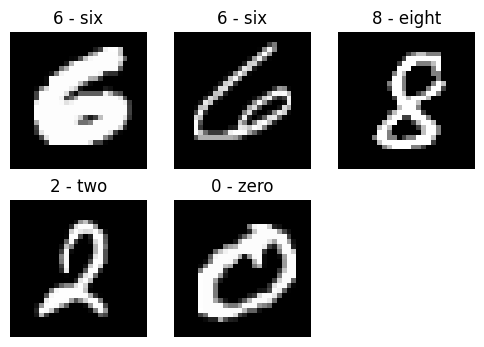

In [110]:
import matplotlib.pyplot as plt
torch.manual_seed(42)

fig = plt.figure(figsize=(6,4))
nrows = 2
ncols = 3

for i in range(1, nrows*ncols):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  fig.add_subplot(nrows, ncols, i)
  img, label = train_data[random_idx]
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(train_data.classes[label])
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the batch_size=32.

In [111]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                              batch_size=32,
                              shuffle=False)
train_dataloader.dataset, test_dataloader.dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 8. Recreate model_2 used in this notebook (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.

In [112]:
img, label = train_data[0]
img.shape

torch.Size([1, 28, 28])

In [113]:
from torch import nn
# Create a convolutional neural network
class MNISTModelV0(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

model_0 = MNISTModelV0(input_shape=1,
                       hidden_units=10,
                       output_shape=len(train_data.classes))

model_0

MNISTModelV0(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [114]:
type(img)

torch.Tensor

In [115]:
model_0(img.unsqueeze(dim=1))

tensor([[ 0.0100, -0.0343, -0.0252,  0.0064,  0.0288, -0.0117, -0.0123,  0.0193,
          0.0020, -0.0236]], grad_fn=<AddmmBackward0>)

## 9. Train the model you built in exercise 8. on CPU and GPU and see how long it takes on each.

In [116]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/Yong-Hui-Liew/PyTorch-Adventure/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [117]:
from timeit import default_timer as timer
from tqdm.auto import tqdm
from helper_functions import accuracy_fn

device = "cpu"
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [119]:
torch.manual_seed(42)

epochs = 3
time_for_train_start_cpu = timer()

for epoch in tqdm(range(epochs)):
  train_step(model=model_0,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)
  test_step(model=model_0,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

time_for_train_end_cpu = timer()
train_time = time_for_train_end_cpu - time_for_train_start_cpu

train_time

  0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 0.07262 | Train accuracy: 97.75%
Test loss: 0.05607 | Test accuracy: 98.35%

Train loss: 0.05534 | Train accuracy: 98.27%
Test loss: 0.03877 | Test accuracy: 98.79%

Train loss: 0.04672 | Train accuracy: 98.53%
Test loss: 0.04623 | Test accuracy: 98.54%



159.28261028999987

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [131]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [132]:
import random
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

In [138]:
pred_probs = make_predictions(model=model_0,
                               data=test_samples)
pred_probs
predictions = pred_probs.argmax(dim=1)
predictions

tensor([2, 1, 2, 4, 6, 6, 4, 9, 1])

In [134]:
test_labels

[2, 1, 2, 4, 6, 6, 4, 9, 1]

In [142]:
class_names = test_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

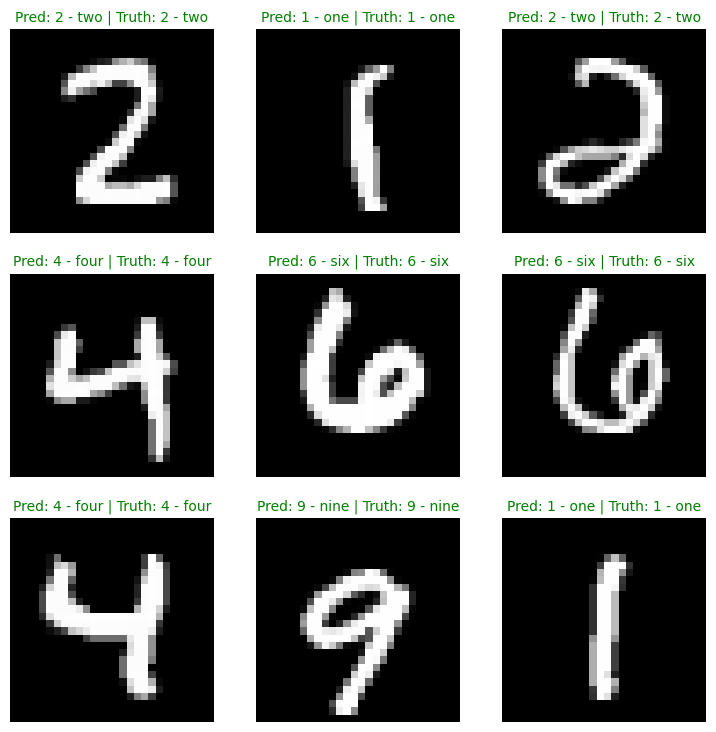

In [144]:
# Plot the predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[predictions[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [150]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_0.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_0(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [151]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1


In [152]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.1


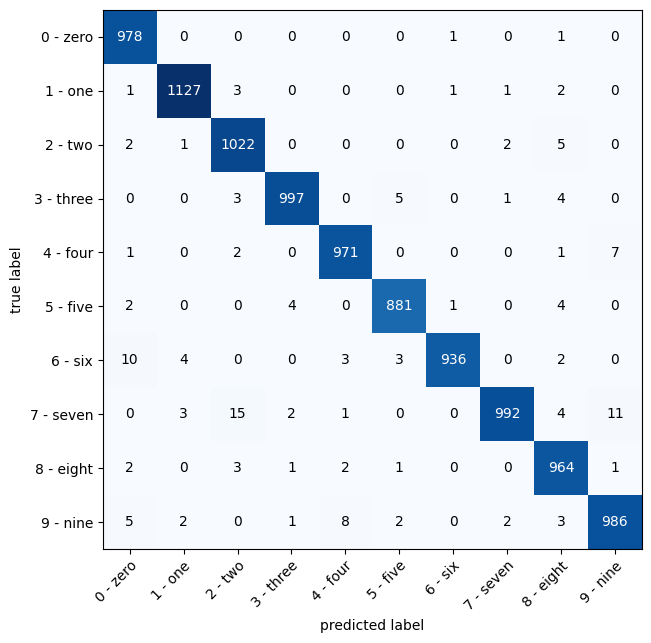

In [153]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names),
                          task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),  # matplotlib likes working with NumPy
    class_names=class_names,  # # turn the row and column labels into class names
    figsize=(10,7)
);

## 12. Create a random tensor of shape [1, 3, 64, 64] and pass it through a nn.Conv2d() layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the kernel_size parameter goes up and down?

In [164]:
random_tensor = torch.rand(size=[1,3,64,64])

layer = nn.Conv2d(in_channels=3,
                  out_channels=10,
                  kernel_size=3,
                  stride=1,
                  padding=1)
output = layer(random_tensor)

random_tensor.shape, output.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1, 10, 64, 64]))

## 13. Use a model similar to the trained model_2 from this notebook to make predictions on the test torchvision.datasets.FashionMNIST dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [168]:
test_data = datasets.FashionMNIST(root="data2",
                                  train=False,
                                  download=True,
                                  transform=ToTensor(),
                                  target_transform=None)


100%|██████████| 26421880/26421880 [00:12<00:00, 2179326.99it/s]


Extracting data2/FashionMNIST/raw/train-images-idx3-ubyte.gz to data2/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 199525.96it/s]


Extracting data2/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data2/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3677990.72it/s]


Extracting data2/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data2/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 12510009.84it/s]

Extracting data2/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data2/FashionMNIST/raw



In [170]:
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)


pred_probs = make_predictions(model=model_0,
                               data=test_samples)
pred_probs
predictions = pred_probs.argmax(dim=1)
predictions

tensor([8, 8, 8, 2, 8, 8, 8, 1, 1])

In [171]:
class_names = test_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

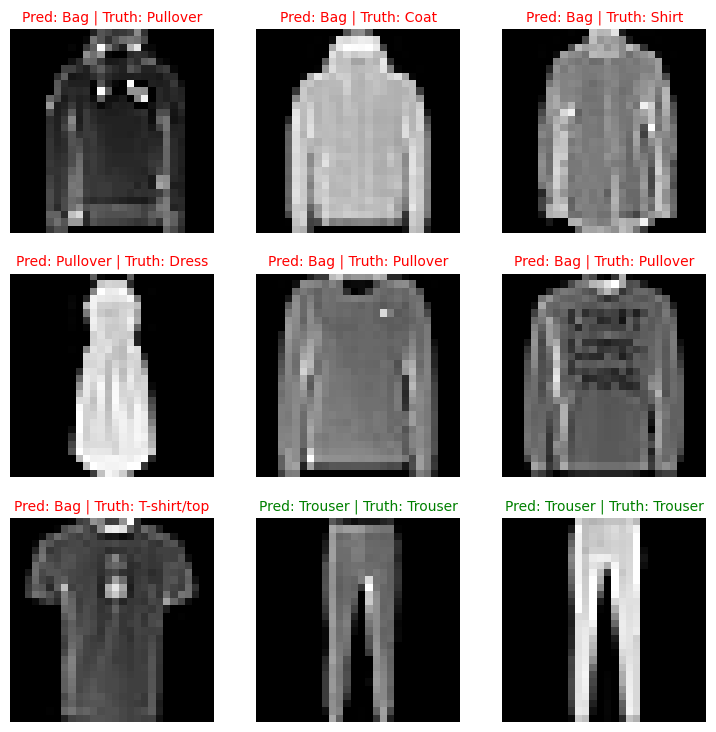

In [172]:
# Plot the predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[predictions[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

From the look of some of these predictions, the model is getting about as confused as I would...

For example it predicts "Sneaker" instead of "Sandal" when it could have easily been a "Sneaker".

The same goes for the confusion between the classes of "T-shirt/top" and "Shirt", many of the examples here look similar.